In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.patches as mpatches
import statsmodels.formula.api as smf

In [2]:
import os
filename = "US_Accidents_March23.csv"
current_directory = "/Users/sanyogitadeshmukh/Downloads"
personal_data_location = os.path.join(current_directory, filename)

# Loading Dataset

In [3]:
# file_path = 'US_Accidents_March23.csv'
original_data = pd.read_csv(personal_data_location)

In [4]:
original_data.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

In [5]:
print(original_data.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [6]:
# View the first few rows of the Start_Time and End_Time columns
print(original_data['Start_Time'].head())
print(original_data['End_Time'].head())


0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object
0    2016-02-08 11:00:00
1    2016-02-08 06:37:59
2    2016-02-08 07:19:27
3    2016-02-08 07:53:34
4    2016-02-08 08:09:07
Name: End_Time, dtype: object


In [7]:
original_data.Start_Time = pd.to_datetime(original_data.Start_Time)
original_data.End_Time = pd.to_datetime(original_data.End_Time)
original_data['Start_Hour'] = original_data['Start_Time'].dt.hour

In [8]:
original_data['Duration']=original_data['End_Time']-original_data['Start_Time']

In [10]:
columns_to_remove=['Source','ID','Distance(mi)','Timezone','Airport_Code', 'Weather_Timestamp','Wind_Chill(F)','Wind_Direction',
       'Wind_Speed(mph)','Weather_Condition','Country','Pressure(in)','Nautical_Twilight','Civil_Twilight','Astronomical_Twilight']

In [11]:
columns_to_remove1=['Start_Lat','Start_Lng','End_Lat','End_Lng']

In [12]:
data=original_data.drop(columns=columns_to_remove)
data=data.drop(columns=columns_to_remove1)

In [13]:
null_values = data.isnull().sum()
null_values

Severity                   0
Start_Time                 0
End_Time                   0
Description                5
Street                 10869
City                     253
County                     0
State                      0
Zipcode                 1915
Temperature(F)        163853
Humidity(%)           174144
Visibility(mi)        177098
Precipitation(in)    2203586
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset         23246
Start_Hour                 0
Duration                   0
dtype: int64

In [14]:
data=data.dropna()

In [15]:
null_values1 = data.isnull().sum()
null_values1

Severity             0
Start_Time           0
End_Time             0
Description          0
Street               0
City                 0
County               0
State                0
Zipcode              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Precipitation(in)    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Start_Hour           0
Duration             0
dtype: int64

In [17]:
data.head()

Severity          Start_Time            End_Time  \
0          3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1          2 2016-02-08 06:07:59 2016-02-08 06:37:59   
5          3 2016-02-08 07:44:26 2016-02-08 08:14:26   
9          3 2016-02-08 08:10:04 2016-02-08 08:40:04   
11         3 2016-02-08 08:21:27 2016-02-08 08:51:27   

                                          Description          Street  \
0   Right lane blocked due to accident on I-70 Eas...          I-70 E   
1   Accident on Brice Rd at Tussing Rd. Expect del...        Brice Rd   
5   Accident on I-270 Outerbelt Northbound near Ex...  Westerville Rd   
9   Right hand shoulder blocked due to accident on...  Westerville Rd   
11  One lane blocked due to accident on I-70 Westb...          I-70 E   

            City      County State     Zipcode  Temperature(F)  ...  Railway  \
0         Dayton  Montgomery    OH       45424            36.9  ...    False   
1   Reynoldsburg    Franklin    OH  43068-3402            37.9  ...    False   
5    Westerville    Franklin    OH       43081            37.9  ...    False   
9    Westerville    Franklin    OH       43081            37.4  ...    False   
11  Reynoldsburg    Franklin    OH       43068            37.4  ...    False   

    Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0        False    False  False            False           False         False   
1        False    False  False            False           False         False   
5        False    False  False            False           False         False   
9        False    False  False            False           False         False   
11       False    False  False            False           False         False   

    Sunrise_Sunset  Start_Hour        Duration  
0            Night           5 0 days 05:14:00  
1            Night           6 0 days 00:30:00  
5              Day           7 0 days 00:30:00  
9              Day           8 0 days 00:30:00  
11             Day           8 0 days 00:30:00  

[5 rows x 29 columns]

In [18]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Temperature(F)', 'Humidity(%)',
       'Visibility(mi)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Start_Hour', 'Duration'],
      dtype='object')

<h1> PART 1 & 2 - Data Cleaning and Exploratory Data Analysis</h1>

# City Analysis 

In [19]:
city_df = pd.DataFrame(data['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [20]:
top_25_cities = city_df.head(25)
top_25_cities

City   Cases
0           Miami  162824
1     Los Angeles  108216
2         Houston   96711
3       Charlotte   92581
4         Orlando   89382
5          Dallas   88861
6         Raleigh   60025
7       Nashville   55861
8          Austin   54785
9     Baton Rouge   52489
10        Atlanta   41262
11      San Diego   40471
12    Minneapolis   38514
13        Phoenix   37621
14       Richmond   35975
15     Sacramento   35123
16   Jacksonville   31451
17         Tucson   29426
18     Greenville   29112
19     Saint Paul   27761
20       Portland   27239
21       Columbia   27236
22  Oklahoma City   26397
23    New Orleans   25668
24    Kansas City   23183

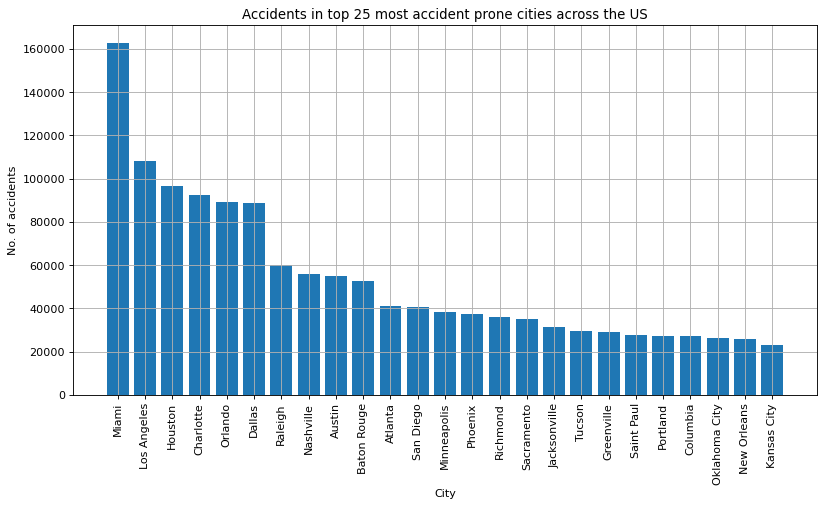

In [21]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)

plt.bar(top_25_cities['City'], top_25_cities['Cases'])
plt.xlabel('City')
plt.ylabel('No. of accidents')
plt.title('Accidents in top 25 most accident prone cities across the US')
plt.xticks(rotation=90)
plt.show()

# State Analysis

In [22]:
state_df = pd.DataFrame(data['State'].value_counts()).reset_index().rename(columns={'index':'StateID', 'State':'Cases'})

In [23]:
state_df.head(25)

StateID    Cases
0       CA  1159187
1       FL   696301
2       TX   350359
3       SC   282985
4       NY   258855
5       NC   237677
6       VA   233233
7       PA   223128
8       MN   154793
9       OR   144870
10      TN   131424
11      LA   115879
12      AZ   114646
13      IL   106839
14      GA   103816
15      MI   103179
16      NJ   101085
17      MD    82304
18      AL    80889
19      OH    79308
20      WA    67553
21      UT    66415
22      CO    62023
23      CT    54547
24      MO    54127

In [24]:
state_df.shape

(49, 2)

In [25]:
state_df

StateID    Cases
0       CA  1159187
1       FL   696301
2       TX   350359
3       SC   282985
4       NY   258855
5       NC   237677
6       VA   233233
7       PA   223128
8       MN   154793
9       OR   144870
10      TN   131424
11      LA   115879
12      AZ   114646
13      IL   106839
14      GA   103816
15      MI   103179
16      NJ   101085
17      MD    82304
18      AL    80889
19      OH    79308
20      WA    67553
21      UT    66415
22      CO    62023
23      CT    54547
24      MO    54127
25      OK    50862
26      MA    39788
27      IN    38092
28      MT    26683
29      WI    23191
30      KY    21338
31      AR    20049
32      IA    18304
33      DC    15959
34      KS    15628
35      NV    14734
36      WV    11844
37      DE    11166
38      MS    11065
39      NE    10978
40      ID     9961
41      RI     9825
42      NM     6454
43      NH     6098
44      WY     2747
45      ND     2732
46      ME     1578
47      VT      622
48      SD      204

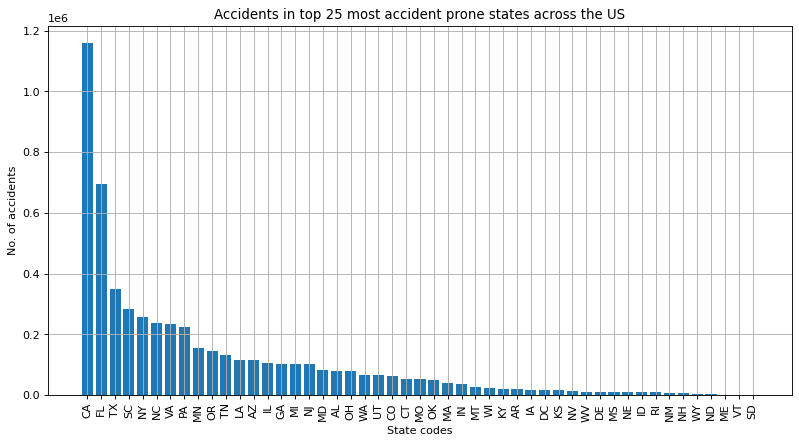

In [26]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)

plt.bar(state_df['StateID'], state_df['Cases'])
plt.xlabel('State codes')
plt.ylabel('No. of accidents')
plt.title('Accidents in top 25 most accident prone states across the US')
plt.xticks(rotation=90)
plt.show()

# Hour Analysis

In [27]:
data['Start_Hour'].unique()

array([ 5,  6,  7,  8, 10, 11, 12, 14, 16, 17, 19, 20, 18, 23,  4,  9, 15,
       13,  3, 21, 22,  0,  1,  2])

In [28]:
hour_df = pd.DataFrame(data['Start_Hour'].value_counts()).reset_index().rename(columns={'index':'Start_Hour', 'Start_Hour':'Cases'})

In [29]:
hour_df

Start_Hour   Cases
0           16  419922
1           17  408015
2            7  389878
3           15  386785
4            8  372076
5           14  328753
6           18  304149
7           13  283438
8            6  281180
9           12  244931
10          11  236583
11           9  229263
12          10  223321
13          19  205120
14           5  163991
15          20  158026
16          21  143239
17          22  126218
18           4  119133
19          23  101485
20           0   90388
21           1   78832
22           2   74515
23           3   66083

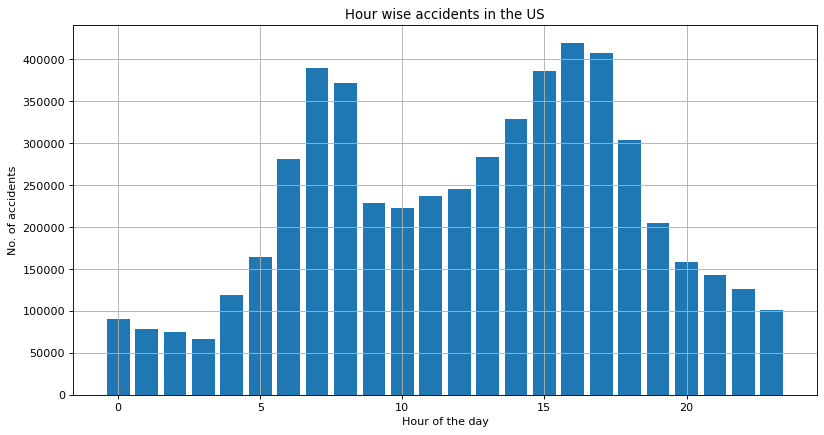

In [30]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)
plt.bar(hour_df['Start_Hour'], hour_df['Cases'])
plt.xlabel('Hour of the day')
plt.ylabel('No. of accidents')
plt.title('Hour wise accidents in the US')
plt.show()

# Street Analysis

In [31]:
street_df = pd.DataFrame(data['Street'].value_counts()).reset_index().rename(columns={'index':'Street', 'Street':'Cases'})

In [32]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df

Street  Cases
0  I-95 S  54977
1  I-95 N  53414
2   I-5 N  49076
3   I-5 S  42562
4  I-10 E  35092
5  I-10 W  34914
6  I-80 W  25796
7  I-80 E  23787
8  I-90 W  20795
9  I-90 E  20630

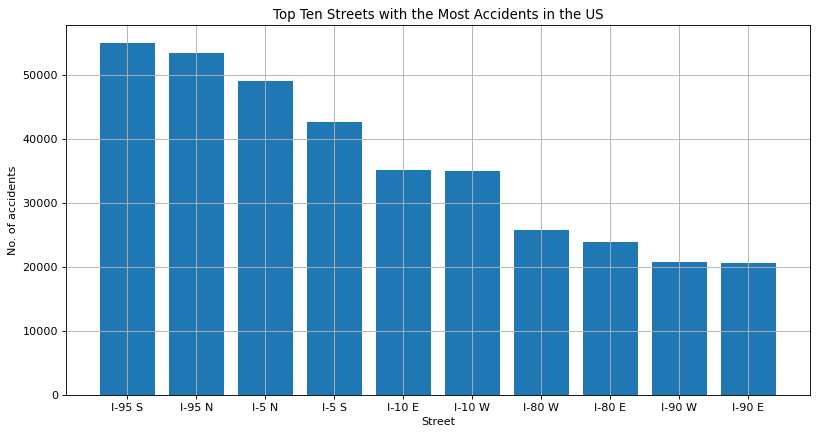

In [33]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)
plt.bar(top_ten_streets_df['Street'], top_ten_streets_df['Cases'])
plt.xlabel('Street')
plt.ylabel('No. of accidents')
plt.title('Top Ten Streets with the Most Accidents in the US')
plt.show()

# Severity Analysis

<h3>The severity rating ranges from 1 to 4, with 1 indicating minor impact (short delay) and 4 indicating major impact (long delay) on traffic. Caution: Severity ratings may vary between sources, so segregate data from different sources for accurate analysis.</h3>

In [34]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(data['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [35]:
fig = go.Figure(go.Funnelarea(
    text=["Severity - 2", "Severity - 3", "Severity - 4", "Severity - 1"],
    values=severity_df.Cases,
    title={"position": "top center", 
           "text": "<b>Impact on Traffic due to Accidents</b>", 
           'font': {'size': 18, 'color': "#7f7f7f"}},
    marker={"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
            "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
))

# Adjusting the plot size
fig.update_layout(width=800, height=600)
fig.show()

# Weather Analysis

In [36]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(data[attribute])
    intervals = [var_min + i * gap for i in range(split + 1)]
    labels = []

    for i in range(1, len(intervals)):
        lower_limit = intervals[i-1]
        upper_limit = intervals[i]
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [37]:
def Feature_Bin_Plot(dataframe, attribute, color, intervals, labels, title):
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x=new_df[attribute], bins=intervals, labels=labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(
        columns={'index': 'Bins', xlabel: 'Cases'}).sort_values('Bins')

    count, max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1

    total = len(new_df[xlabel])
    plt.figure(figsize=(12, 6))

    if isinstance(color, str):  # Check if color is a string
        clrs = [color] * len(intervals)
    else:
        cmap = cm.get_cmap(color, len(intervals))
        clrs = [mcolors.rgb2hex(cmap(i)) for i in range(cmap.N)]

    ax = sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs)

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(),
                '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100 * i.get_height() / total, 2)),
                fontsize=14, ha='center', color='black')

    plt.title(title, size=20, color='grey')

    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

    ax.set_axisbelow(True)
    ax.grid(axis='y', color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout for better spacing
    MA = mpatches.Patch(color=clrs[max_index],
                        label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, labelcolor=[clrs[max_index]],
              edgecolor='white')
    plt.show()

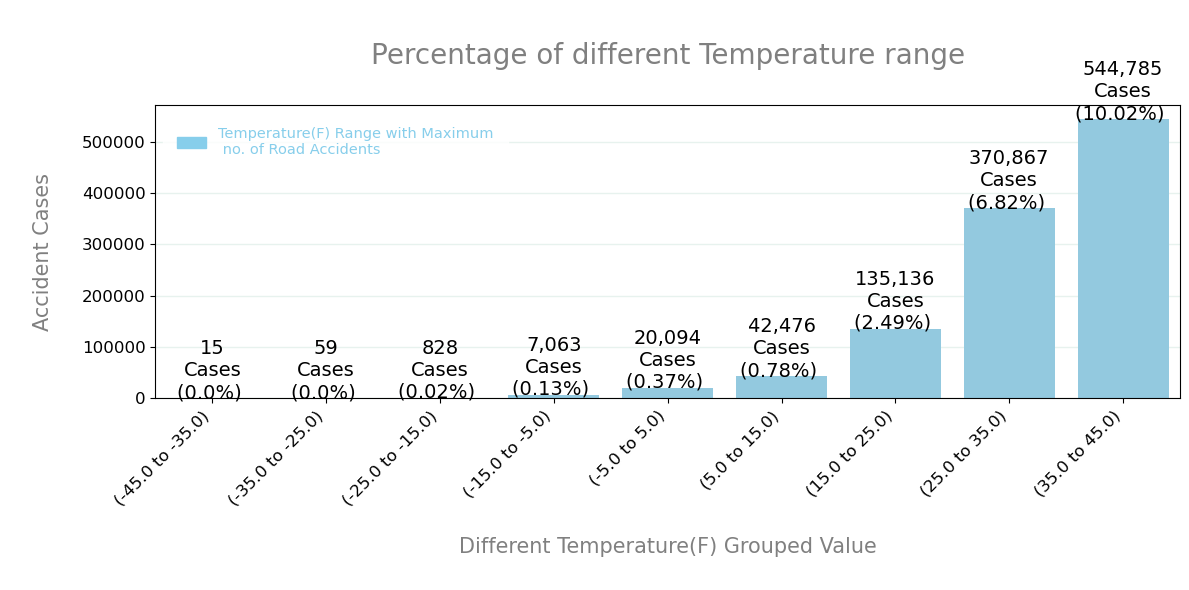

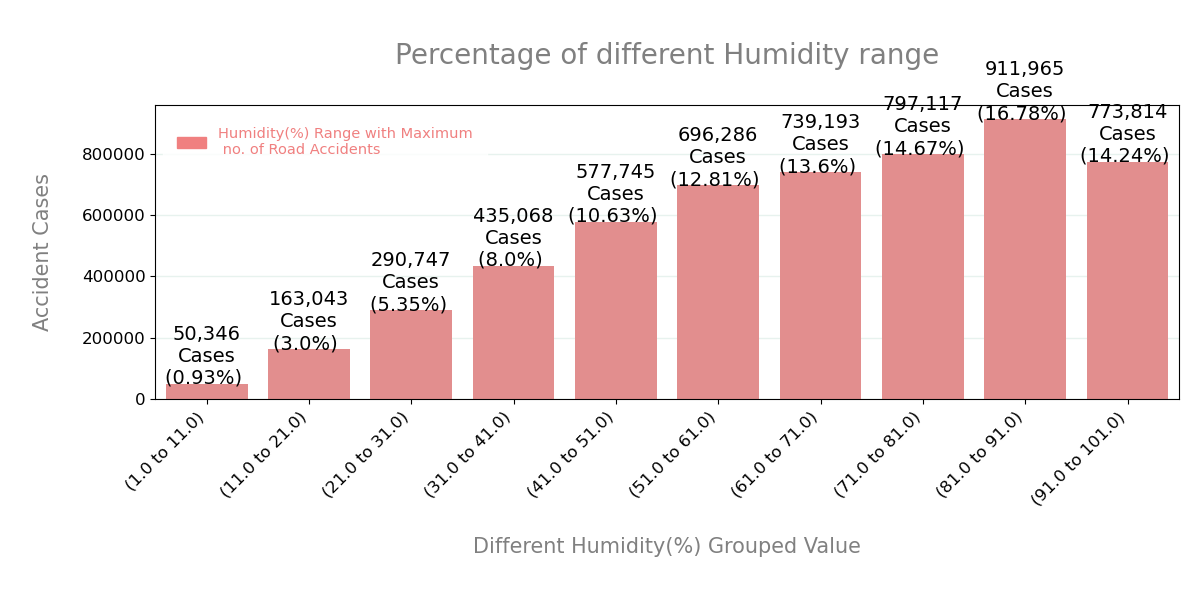

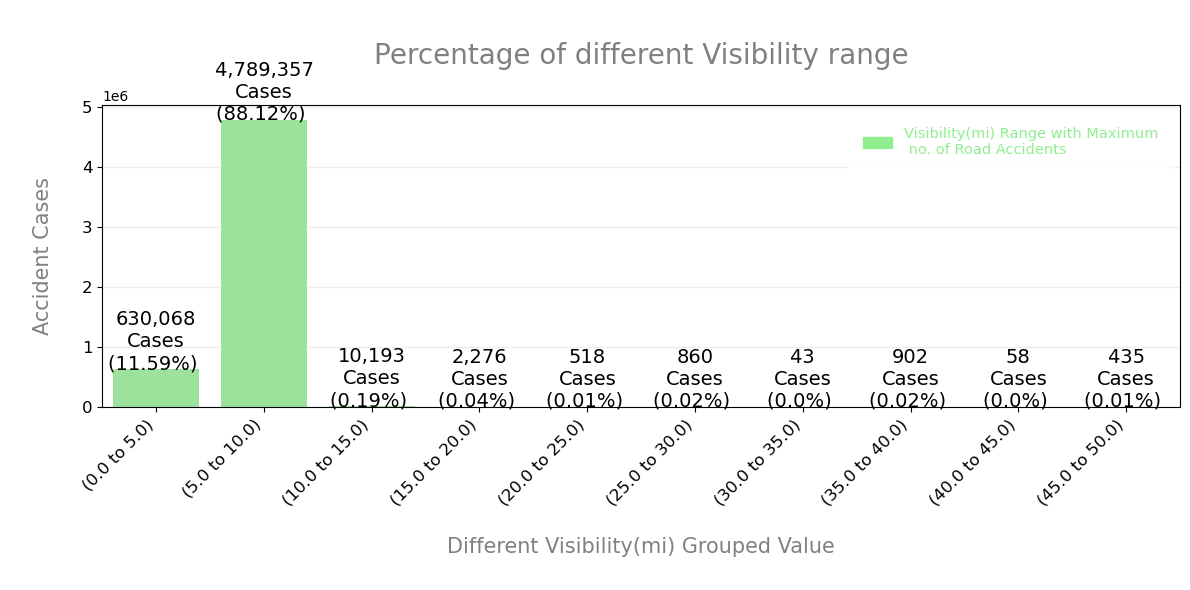

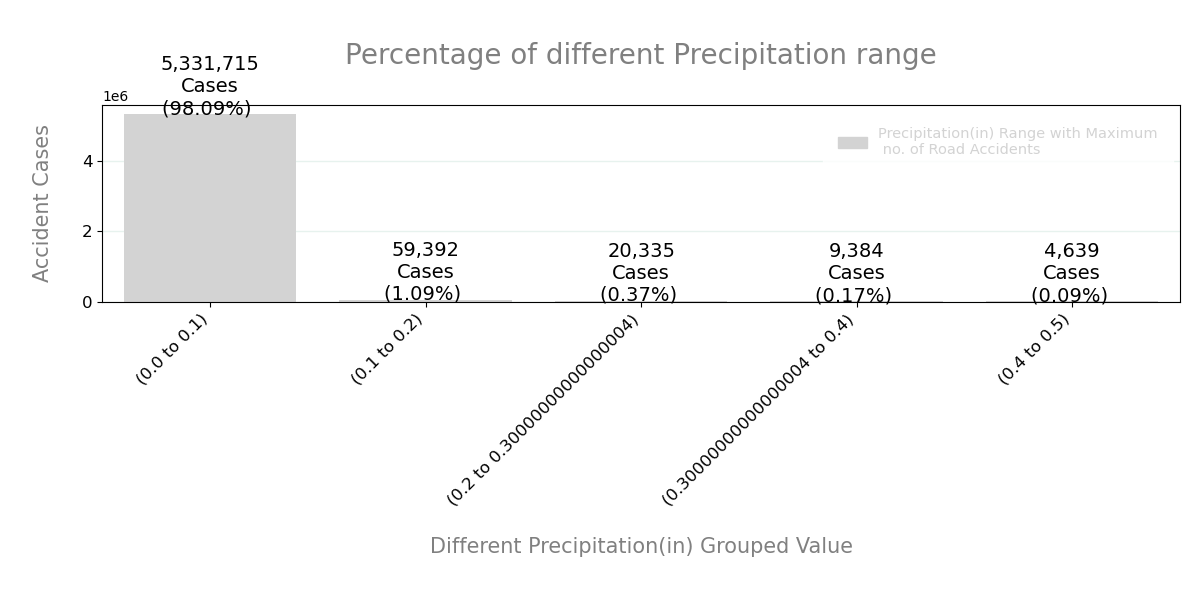

In [38]:
# Weather Analysis
# Temperature Analysis
temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 10)
Feature_Bin_Plot(data, 'Temperature(F)', 'skyblue', temp_intervals, temp_labels, '\nPercentage of different Temperature range\n')

# Humidity Analysis
humidity_intervals, humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)
Feature_Bin_Plot(data, 'Humidity(%)', 'lightcoral', humidity_intervals, humidity_labels, '\nPercentage of different Humidity range\n')

# Visibility Analysis
visibility_intervals, visibility_labels = generate_intervals_labels('Visibility(mi)', 10, 5)
Feature_Bin_Plot(data, 'Visibility(mi)', 'lightgreen', visibility_intervals, visibility_labels, '\nPercentage of different Visibility range\n')

# Precipitation Analysis
precipitation_intervals, precipitation_labels = generate_intervals_labels('Precipitation(in)', 5, 0.1)
Feature_Bin_Plot(data, 'Precipitation(in)', 'lightgrey', precipitation_intervals, precipitation_labels, '\nPercentage of different Precipitation range\n')


# Hypothesis Testings

popdata loading
Count of accidents as a column
merged_df= data + popdata
clean merged_df


In [40]:
population_df = pd.read_csv('population.csv')

In [41]:
population_df.head()

fips         state  densityMi   pop2023   pop2022   pop2020     pop2019  \
0     6    California  249.81347  38915693  39029342  39501653  39276883.3   
1    48         Texas  116.75553  30500280  30029572  29232474  28823782.7   
2    12       Florida  422.59351  22661577  22244823  21589602  21310772.8   
3    36      New York  413.71663  19496810  19677151  20108296  20035276.6   
4    42  Pennsylvania  289.02749  12931957  12972008  12994440  12965233.9   

    pop2010  growthRate  growth  growthSince2010    area  rank   percent  
0  37253956    -0.00291 -113649          0.04461  155779     1  0.116560  
1  25145561     0.01567  470708          0.21295  261232     2  0.091354  
2  18801310     0.01873  416754          0.20532   53625     3  0.067876  
3  19378102    -0.00916 -180341          0.00613   47126     4  0.058397  
4  12702379    -0.00309  -40051          0.01807   44743     5  0.038734

In [42]:
population_df_cleaned = population_df[['state', 'pop2023']]

In [43]:
population_df_cleaned.head()

state   pop2023
0    California  38915693
1         Texas  30500280
2       Florida  22661577
3      New York  19496810
4  Pennsylvania  12931957

In [44]:
# Assuming you have a mapping DataFrame with 'state' and 'StateID' for all 50 states
state_mapping_df = pd.DataFrame({
    'state': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
              'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan',
              'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Tennessee',
              'Massachusetts', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin',
              'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana',
              'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah',
              'Nevada', 'Iowa', 'Arkansas', 'Kansas', 'Mississippi', 'New Mexico',
              'Idaho', 'Nebraska', 'West Virginia', 'Hawaii', 'New Hampshire',
              'Maine', 'Montana', 'Rhode Island', 'Delaware', 'South Dakota',
              'North Dakota', 'Alaska', 'Vermont', 'Wyoming'],
    'State': ['CA', 'TX', 'FL', 'NY', 'PA',
                'IL', 'OH', 'GA', 'NC', 'MI',
                'NJ', 'VA', 'WA', 'AZ', 'TN',
                'MA', 'IN', 'MO', 'MD', 'WI',
                'CO', 'MN', 'SC', 'AL', 'LA',
                'KY', 'OR', 'OK', 'CT', 'UT',
                'NV', 'IA', 'AR', 'KS', 'MS', 'NM',
                'ID', 'NE', 'WV', 'HI', 'NH',
                'ME', 'MT', 'RI', 'DE', 'SD',
                'ND', 'AK', 'VT', 'WY']
})

# Assuming you have a DataFrame with state names and pop2023
pop2023_df = pd.DataFrame({
    'state': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
              'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan',
              'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Tennessee',
              'Massachusetts', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin',
              'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana',
              'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah',
              'Nevada', 'Iowa', 'Arkansas', 'Kansas', 'Mississippi', 'New Mexico',
              'Idaho', 'Nebraska', 'West Virginia', 'Hawaii', 'New Hampshire',
              'Maine', 'Montana', 'Rhode Island', 'Delaware', 'South Dakota',
              'North Dakota', 'Alaska', 'Vermont', 'Wyoming'],
    'pop2023': [38915693, 30500280, 22661577, 19496810, 12931957,
                12477595, 11747774, 11037723, 10832061, 10030722,
                9255437, 8709873, 7830827, 7453517, 7134327,
                6974258, 6852542, 6186091, 6154710, 5904977,
                5868555, 5722897, 5372002, 5098746, 4553384,
                4518031, 4223973, 4048375, 3629055, 3422487,
                3209142, 3203345, 3063152, 2936378, 2930528, 2110011,
                1973752, 1972292, 1764786, 1433238, 1402957,
                1393442, 1139507, 1090483, 1031985, 923484,
                780588, 732984, 647156, 583279]
})

# Merge with the state_mapping_df to replace state names with state IDs
pop2023_df = pd.merge(pop2023_df, state_mapping_df, left_on='state', right_on='state', how='left')

# Drop the 'state' column, as we now have 'StateID'
pop2023_df = pop2023_df.drop(columns=['state'])


In [45]:
pop2023_df.head()

pop2023 State
0  38915693    CA
1  30500280    TX
2  22661577    FL
3  19496810    NY
4  12931957    PA

In [46]:
data_2023 = data[data['Start_Time'].dt.year == 2023]
data_2023 = data_2023[data['End_Time'].dt.year == 2023]
data_2023.head()

/var/folders/tt/1dxb89_j1b74mw92mh7qrg1w0000gp/T/ipykernel_27224/305468425.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Severity          Start_Time            End_Time  \
3640578         2 2023-03-31 17:09:16 2023-03-31 18:09:49   
3640579         2 2023-02-27 20:55:00 2023-02-27 23:36:34   
3640580         2 2023-02-26 09:31:45 2023-02-26 11:58:19   
3640581         2 2023-03-21 17:46:42 2023-03-21 18:31:50   
3640582         2 2023-03-24 04:46:30 2023-03-24 09:22:00   

                                               Description  \
3640578  Accident on US-10 E from CR-4/75th St NW (US-1...   
3640579  Crash on I-84 westbound .8 miles west of Exit ...   
3640580  Port Authority NY/NJ: Crash on George Washingt...   
3640581  Slow traffic on I-20 E - GA-402 E from Flat Sh...   
3640582  Stationary traffic on I-105 W - Glenn Anderson...   

                        Street         City       County State     Zipcode  \
3640578             75th St NW  Sauk Rapids       Benton    MN  56379-9511   
3640579            Aberdeen Rd       Moscow   Lackawanna    PA       18444   
3640580  George Washington Brg     New York     New York    NY       10032   
3640581                   I-20      Decatur       Dekalb    GA       30034   
3640582   Glenn Anderson Fwy W  Los Angeles  Los Angeles    CA       90061   

         Temperature(F)  ...  Railway  Roundabout  Station   Stop  \
3640578            33.0  ...    False       False    False  False   
3640579            32.0  ...    False       False    False  False   
3640580            31.0  ...    False       False    False  False   
3640581            61.0  ...    False       False    False  False   
3640582            57.0  ...    False       False    False  False   

         Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
3640578            False           False         False             Day   
3640579            False           False         False           Night   
3640580            False           False         False             Day   
3640581            False           False         False             Day   
3640582            False           False         False           Night   

         Start_Hour        Duration  
3640578          17 0 days 01:00:33  
3640579          20 0 days 02:41:34  
3640580           9 0 days 02:26:34  
3640581          17 0 days 00:45:08  
3640582           4 0 days 04:35:30  

[5 rows x 29 columns]

In [48]:
data_2023 = pd.merge(data_2023, pop2023_df, on='State', how='inner')
data_2023.head()

Severity          Start_Time            End_Time  \
0         2 2023-03-31 17:09:16 2023-03-31 18:09:49   
1         2 2023-03-31 20:03:46 2023-03-31 21:06:41   
2         2 2023-02-28 09:17:39 2023-02-28 10:18:19   
3         2 2023-03-28 14:49:21 2023-03-28 16:12:26   
4         2 2023-03-27 15:52:36 2023-03-27 16:53:14   

                                         Description           Street  \
0  Accident on US-10 E from CR-4/75th St NW (US-1...       75th St NW   
1  Accident on MN-62 E - Crosstown Hwy E from Blo...  Crosstown Hwy E   
2  Accident on MN-19 from MN-56/MN-56 Blvd/320th ...   Oxford Mill Rd   
3  Accident on I-35W N from MN-280/MN-36/Exit 23 ...          I-35W N   
4  Accident on US-10 E from 260th St (US-10) to C...       Highway 10   

           City    County State     Zipcode  Temperature(F)  ...  Roundabout  \
0   Sauk Rapids    Benton    MN  56379-9511            33.0  ...       False   
1   Minneapolis  Hennepin    MN       55417            34.0  ...       False   
2  Cannon Falls   Goodhue    MN  55009-7136            25.0  ...       False   
3    Saint Paul    Ramsey    MN       55113            36.0  ...       False   
4       Cushing  Morrison    MN  56443-2755            32.0  ...       False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            False           False         False   
1    False  False            False           False         False   
2    False  False            False           False         False   
3    False  False            False           False         False   
4    False  False            False           False         False   

   Sunrise_Sunset  Start_Hour        Duration  pop2023  
0             Day          17 0 days 01:00:33  5722897  
1           Night          20 0 days 01:02:55  5722897  
2             Day           9 0 days 01:00:40  5722897  
3             Day          14 0 days 01:23:05  5722897  
4             Day          15 0 days 01:00:38  5722897  

[5 rows x 30 columns]

In [49]:
data_2023['Start_Time'] = pd.to_datetime(data_2023['Start_Time'])

data_2023['Year'] = data_2023['Start_Time'].dt.year
data_2023['Month'] = data_2023['Start_Time'].dt.month
data_2023['Day'] = data_2023['Start_Time'].dt.day

data_2023.head()

Severity          Start_Time            End_Time  \
0         2 2023-03-31 17:09:16 2023-03-31 18:09:49   
1         2 2023-03-31 20:03:46 2023-03-31 21:06:41   
2         2 2023-02-28 09:17:39 2023-02-28 10:18:19   
3         2 2023-03-28 14:49:21 2023-03-28 16:12:26   
4         2 2023-03-27 15:52:36 2023-03-27 16:53:14   

                                         Description           Street  \
0  Accident on US-10 E from CR-4/75th St NW (US-1...       75th St NW   
1  Accident on MN-62 E - Crosstown Hwy E from Blo...  Crosstown Hwy E   
2  Accident on MN-19 from MN-56/MN-56 Blvd/320th ...   Oxford Mill Rd   
3  Accident on I-35W N from MN-280/MN-36/Exit 23 ...          I-35W N   
4  Accident on US-10 E from 260th St (US-10) to C...       Highway 10   

           City    County State     Zipcode  Temperature(F)  ...  \
0   Sauk Rapids    Benton    MN  56379-9511            33.0  ...   
1   Minneapolis  Hennepin    MN       55417            34.0  ...   
2  Cannon Falls   Goodhue    MN  55009-7136            25.0  ...   
3    Saint Paul    Ramsey    MN       55113            36.0  ...   
4       Cushing  Morrison    MN  56443-2755            32.0  ...   

   Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  Start_Hour  \
0            False           False         False             Day          17   
1            False           False         False           Night          20   
2            False           False         False             Day           9   
3            False           False         False             Day          14   
4            False           False         False             Day          15   

         Duration  pop2023  Year  Month  Day  
0 0 days 01:00:33  5722897  2023      3   31  
1 0 days 01:02:55  5722897  2023      3   31  
2 0 days 01:00:40  5722897  2023      2   28  
3 0 days 01:23:05  5722897  2023      3   28  
4 0 days 01:00:38  5722897  2023      3   27  

[5 rows x 33 columns]

In [54]:
relevant_columns = ['Severity','Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month','Day']
data_subset = data_2023[relevant_columns]

# Pearson Correlation
pearson_corr = data_subset.corr(method='pearson')
pearson_corr

Severity  Temperature(F)  Humidity(%)  Visibility(mi)  \
Severity           1.000000       -0.034654     0.011414        0.004129   
Temperature(F)    -0.034654        1.000000    -0.351093        0.276750   
Humidity(%)        0.011414       -0.351093     1.000000       -0.510401   
Visibility(mi)     0.004129        0.276750    -0.510401        1.000000   
Precipitation(in) -0.010090       -0.002073     0.208276       -0.308317   
Month              0.018948        0.029004    -0.149374        0.050132   
Day               -0.007357       -0.090538    -0.037868        0.004560   

                   Precipitation(in)     Month       Day  
Severity                   -0.010090  0.018948 -0.007357  
Temperature(F)             -0.002073  0.029004 -0.090538  
Humidity(%)                 0.208276 -0.149374 -0.037868  
Visibility(mi)             -0.308317  0.050132  0.004560  
Precipitation(in)           1.000000  0.010918 -0.015802  
Month                       0.010918  1.000000  0.117296  
Day                        -0.015802  0.117296  1.000000

In [55]:
# Spearman Correlation
spearman_corr = data_subset.corr(method='spearman')
spearman_corr

Severity  Temperature(F)  Humidity(%)  Visibility(mi)  \
Severity           1.000000       -0.037569     0.010371        0.004421   
Temperature(F)    -0.037569        1.000000    -0.351445        0.289374   
Humidity(%)        0.010371       -0.351445     1.000000       -0.598443   
Visibility(mi)     0.004421        0.289374    -0.598443        1.000000   
Precipitation(in) -0.011636       -0.102824     0.377057       -0.484386   
Month              0.021343        0.016615    -0.154675        0.053089   
Day               -0.008093       -0.092200    -0.033979       -0.004289   

                   Precipitation(in)     Month       Day  
Severity                   -0.011636  0.021343 -0.008093  
Temperature(F)             -0.102824  0.016615 -0.092200  
Humidity(%)                 0.377057 -0.154675 -0.033979  
Visibility(mi)             -0.484386  0.053089 -0.004289  
Precipitation(in)           1.000000  0.023442  0.004344  
Month                       0.023442  1.000000  0.043965  
Day                         0.004344  0.043965  1.000000

In [56]:
normal_corr = data_subset.corr()
normal_corr

Severity  Temperature(F)  Humidity(%)  Visibility(mi)  \
Severity           1.000000       -0.034654     0.011414        0.004129   
Temperature(F)    -0.034654        1.000000    -0.351093        0.276750   
Humidity(%)        0.011414       -0.351093     1.000000       -0.510401   
Visibility(mi)     0.004129        0.276750    -0.510401        1.000000   
Precipitation(in) -0.010090       -0.002073     0.208276       -0.308317   
Month              0.018948        0.029004    -0.149374        0.050132   
Day               -0.007357       -0.090538    -0.037868        0.004560   

                   Precipitation(in)     Month       Day  
Severity                   -0.010090  0.018948 -0.007357  
Temperature(F)             -0.002073  0.029004 -0.090538  
Humidity(%)                 0.208276 -0.149374 -0.037868  
Visibility(mi)             -0.308317  0.050132  0.004560  
Precipitation(in)           1.000000  0.010918 -0.015802  
Month                       0.010918  1.000000  0.117296  
Day                        -0.015802  0.117296  1.000000

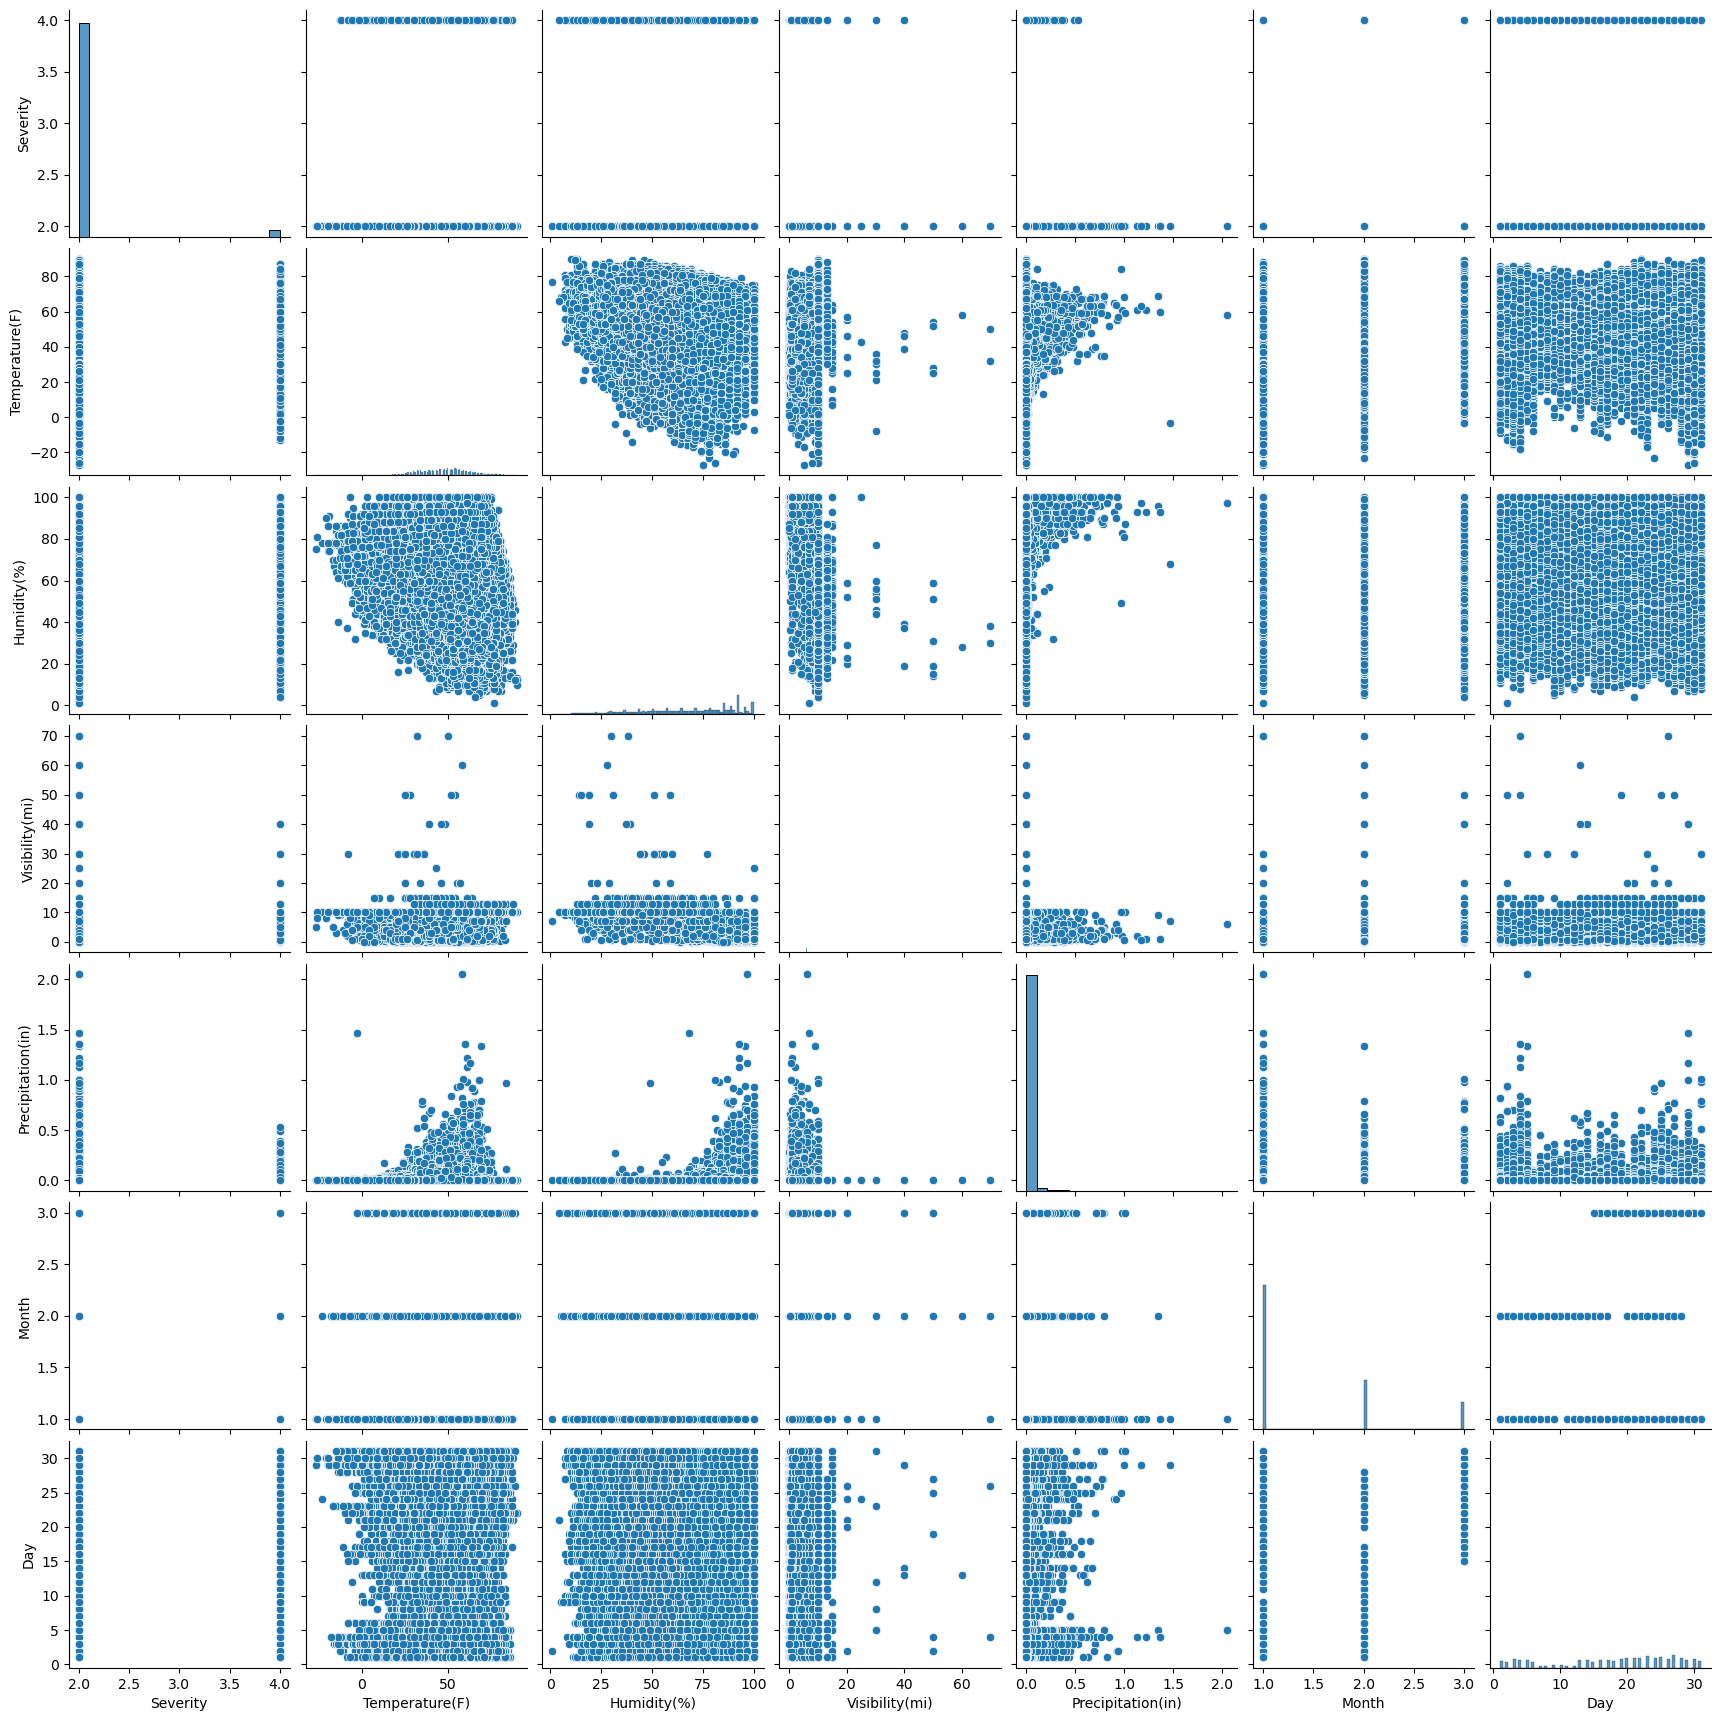

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data_2023` is your DataFrame
relevant_columns = ['Severity','Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month', 'Day']
data_subset = data_2023[relevant_columns]

sns.pairplot(data_subset)
plt.show()


In [58]:
import pandas as pd
import scipy.stats as stats

# Assuming 'data' is your pandas DataFrame with the relevant columns
relevant_columns = ['Severity','Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month', 'Day']
data_subset = data_2023[relevant_columns]

# Handle NaN values by filling them with the mean of their respective columns
data_subset.fillna(data_subset.mean(), inplace=True)

# Calculate p-values
p_values = pd.DataFrame(index=pearson_corr.columns, columns=pearson_corr.columns)

for row in pearson_corr.columns:
    for col in pearson_corr.columns:
        if row != col:
            p_values[row][col] = stats.pearsonr(data_subset[row], data_subset[col])[1]
        else:
            p_values[row][col] = None

print("\nP-values:")
p_values



P-values:


/var/folders/tt/1dxb89_j1b74mw92mh7qrg1w0000gp/T/ipykernel_27224/1801863289.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Severity Temperature(F) Humidity(%) Visibility(mi)  \
Severity               None            0.0         0.0       0.047591   
Temperature(F)          0.0           None         0.0            0.0   
Humidity(%)             0.0            0.0        None            0.0   
Visibility(mi)     0.047591            0.0         0.0           None   
Precipitation(in)  0.000001       0.319931         0.0            0.0   
Month                   0.0            0.0         0.0            0.0   
Day                0.000416            0.0         0.0       0.028714   

                  Precipitation(in) Month       Day  
Severity                   0.000001   0.0  0.000416  
Temperature(F)             0.319931   0.0       0.0  
Humidity(%)                     0.0   0.0       0.0  
Visibility(mi)                  0.0   0.0  0.028714  
Precipitation(in)              None   0.0       0.0  
Month                           0.0  None       0.0  
Day                             0.0   0.0      None

# Hypothesis 1: Weather conditions significantly impact the severity of traffic accidents.

Null Hypothesis (H0): There is no linear relationship between the selected weather conditions and the severity of road accidents.

Alternative Hypothesis (H1): There is a linear relationship between the selected weather conditions and the severity of road accidents.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming data_subset is your DataFrame with selected columns
X = data_subset[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month', 'Day']]
y = data_subset['Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 0.10438187929740494
Coefficients: [-0.00078722  0.00017555  0.0016696  -0.0799387   0.01050824 -0.00049993]
Intercept: 2.0616317932781185


In [60]:
import statsmodels.api as sm

X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const).fit()

model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     63.39
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           5.75e-79
Time:                        21:54:54   Log-Likelihood:                -56694.
No. Observations:              184116   AIC:                         1.134e+05
Df Residuals:                  184109   BIC:                         1.135e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0616      0.006    333.716      0.000       2.050       2.074
Temperature(F)       -0.0008   5.48e-05    -14.365      0.000      -0.001      -0.001
Humidity(%)           0.0002   4.16e-05      4.220      0.000     9.4e-05       0.000
Visibility(mi)        0.0017      0.000      5.425      0.000       0.001       0.002
Precipitation(in)    -0.0799      0.023     -3.475      0.001      -0.125      -0.035
Month                 0.0105      0.001      9.422      0.000       0.008       0.013
Day                  -0.0005   8.74e-05     -5.718      0.000      -0.001      -0.000
==============================================================================
Omnibus:                   195410.470   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8231651.697
Skew:                           5.712   Prob(JB):                         0.00
Kurtosis:                      33.700   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Assuming data_subset is your DataFrame and 'Severity' is your ordinal outcome
# Convert 'Severity' to a categorical variable with order
data_subset['Severity'] = pd.Categorical(data_subset['Severity'], ordered=True)

# Define predictors and outcome
X = data_subset[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month', 'Day']]
y = data_subset['Severity']

# Fit the model
mod = OrderedModel(y, X, distr='logit')
res = mod.fit(method='bfgs')  # BFGS is a type of optimizer

# Summary of the model
res.summary()

/var/folders/tt/1dxb89_j1b74mw92mh7qrg1w0000gp/T/ipykernel_27224/3984327262.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Optimization terminated successfully.
         Current function value: 0.125685
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:               Severity   Log-Likelihood:                -28926.
Model:                   OrderedModel   AIC:                         5.787e+04
Method:            Maximum Likelihood   BIC:                         5.794e+04
Date:                Sat, 09 Dec 2023                                         
Time:                        22:22:30                                         
No. Observations:              230146                                         
Df Residuals:                  230139                                         
Df Model:                           6                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Temperature(F)       -0.0144      0.001    -16.236      0.000      -0.016      -0.013
Humidity(%)           0.0032      0.001      4.619      0.000       0.002       0.005
Visibility(mi)        0.0295      0.005      6.010      0.000       0.020       0.039
Precipitation(in)    -2.2776      0.566     -4.027      0.000      -3.386      -1.169
Month                 0.1946      0.018     10.906      0.000       0.160       0.230
Day                  -0.0088      0.001     -6.164      0.000      -0.012      -0.006
2/4                   3.4853      0.100     34.762      0.000       3.289       3.682
=====================================================================================
"""

Since the p-values for all predictors are less than 0.05, they are all statistically significant at the 5% level, meaning there is a strong association between these weather conditions and the severity of accidents.

In [72]:
#Predictive Analysis
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming you have X, y, and the fit_ordered_logit function from the previous code

# Define the number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

# Initialize an array to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training set
    final_model = fit_ordered_logit(X_train, y_train)

    # Predict on the testing set
    y_pred = final_model.predict(X_test)

    # Convert predicted probabilities to predicted categories
    y_pred_category = y_pred.idxmax(axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_category)
    cv_scores.append(accuracy)

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.0, 0.0, 0.0, 0.0, 0.0]
Average accuracy: 0.0


Accuracy: 0.9648
Feature Importances:
Temperature(F)       0.299810
Humidity(%)          0.350906
Visibility(mi)       0.075062
Precipitation(in)    0.033287
Month                0.016510
Day                  0.224425
dtype: float64

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98     44793
           4       0.11      0.05      0.06      1237

    accuracy                           0.96     46030
   macro avg       0.54      0.52      0.52     46030
weighted avg       0.95      0.96      0.96     46030


Confusion Matrix:
[[44356   437]
 [ 1181    56]]


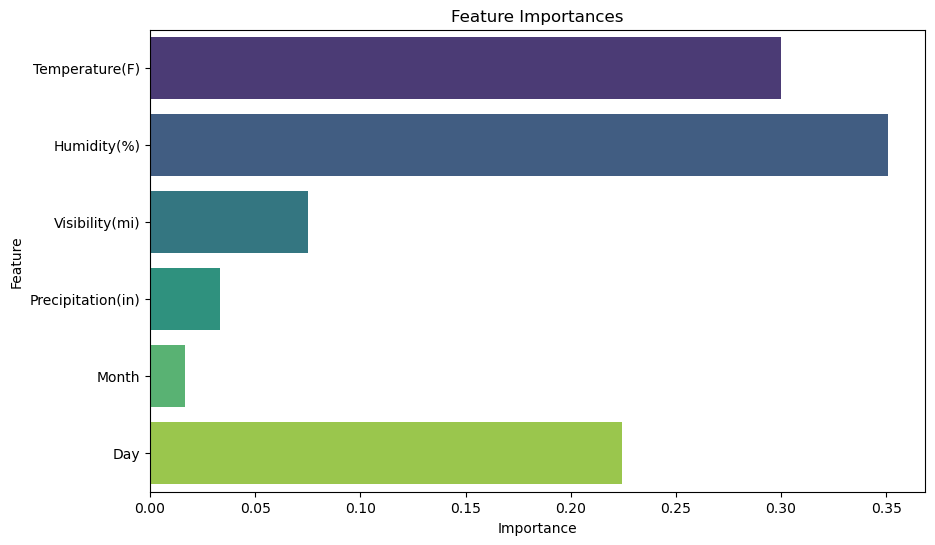

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_subset is your DataFrame with selected columns
X = data_subset[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Month', 'Day']]
y = data_subset['Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print('Feature Importances:')
print(feature_importances)

# Print a classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


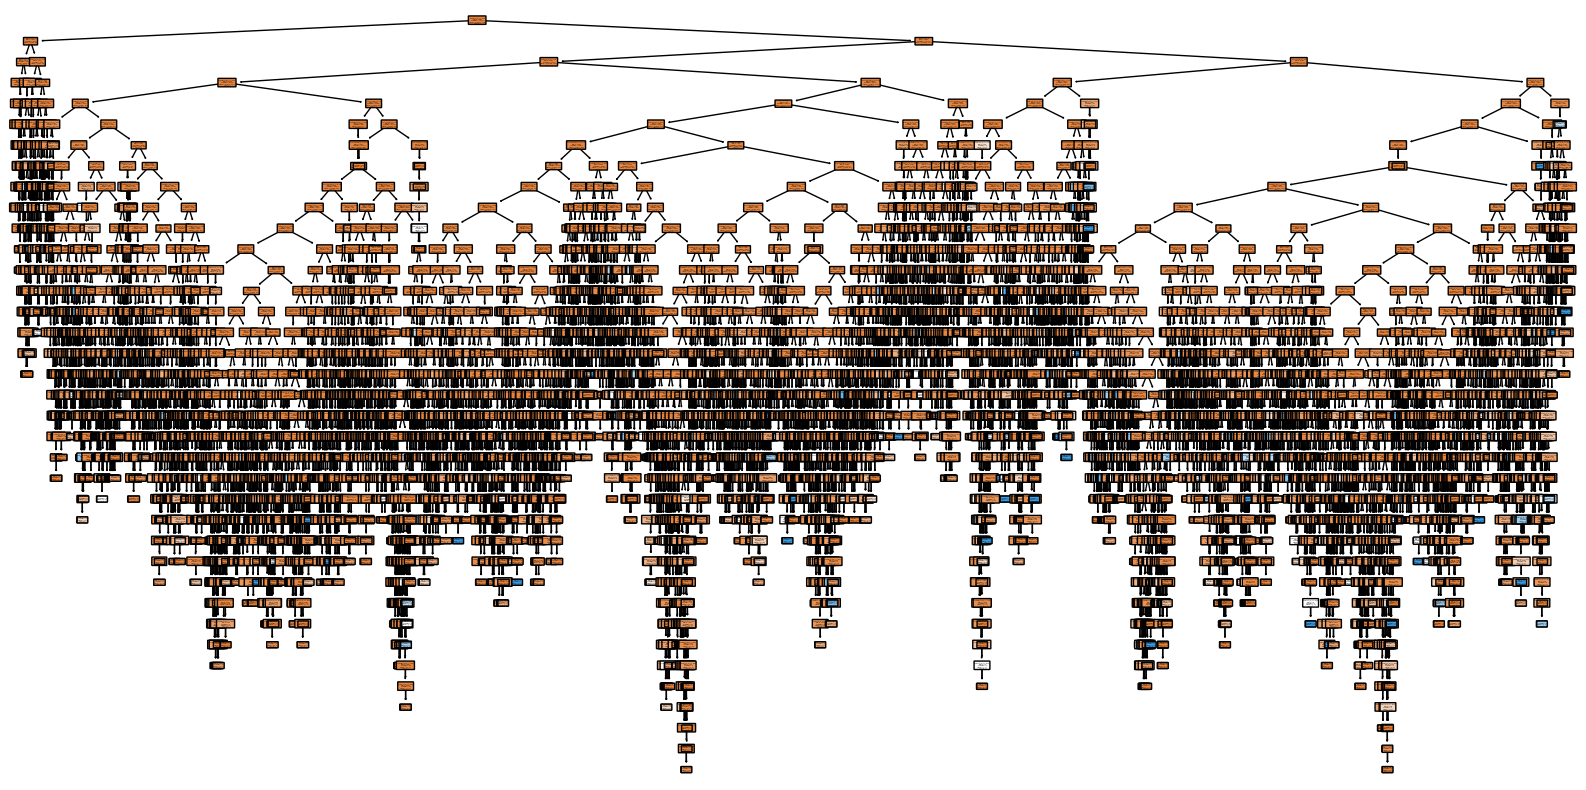

In [75]:
from sklearn.tree import plot_tree

# Get one of the trees from the forest (e.g., the first tree)
tree_to_plot = clf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), class_names=['2', '4'], filled=True, rounded=True)
plt.show()

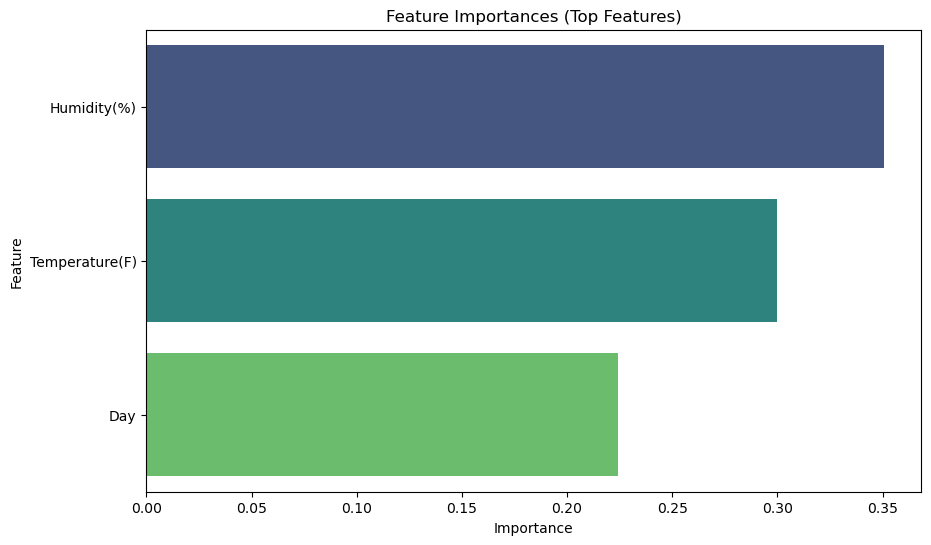

In [77]:
#Select top features based on importance
top_features = feature_importances.nlargest(3).index
X_top = X[top_features]

# Split the data into training and testing sets using top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Retrain the model with top features
clf_top = RandomForestClassifier(random_state=42)
clf_top.fit(X_train_top, y_train_top)

# Visualize Feature Importances for Top Features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.loc[top_features], y=top_features, palette='viridis')
plt.title('Feature Importances (Top Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()